In [ ]:
#@title ライブラリのインストール

!pip install -q ultralytics
!git clone https://github.com/edihbrandon/RictyDiminished.git


import colorsys
import os
import random
import re

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFont
from pydantic import BaseModel
from ultralytics import YOLO


fatal: destination path 'RictyDiminished' already exists and is not an empty directory.



ライブラリのバージョンの確認方法
```
# OpenCVのバージョン
import cv2
print(f"OpenCV (cv2) バージョン: {cv2.__version__}")

# NumPyのバージョン
import numpy as np
print(f"NumPy バージョン: {np.__version__}")

# Matplotlibのバージョン
import matplotlib
print(f"Matplotlib バージョン: {matplotlib.__version__}")

# Pillowのバージョン
import PIL
print(f"Pillow バージョン: {PIL.__version__}")

# Pydanticのバージョン
import pydantic
print(f"Pydantic バージョン: {pydantic.__version__}")

# Ultralyticsのバージョン
import ultralytics
print(f"Ultralytics バージョン: {ultralytics.__version__}")
```

```
OpenCV (cv2) バージョン: 4.10.0
NumPy バージョン: 1.26.4
Matplotlib バージョン: 3.10.0
Pillow バージョン: 11.1.0
Pydantic バージョン: 2.10.4
Ultralytics バージョン: 8.3.59
```

In [ ]:
# @title Google Driveのマウント

from google.colab import drive

drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


下記のURLから画像ファイルをダウンロードしてください。サイズは1280×785にしてください。ダウンロード後、Google Colabにアップロードしてください。



**[画像のURL](https://pixabay.com/ja/photos/%E5%AD%90%E4%BE%9B-%E7%8A%AC-%E3%83%95%E3%82%A3%E3%83%BC%E3%83%AB%E3%83%89-%E7%94%B7%E3%81%AE%E5%AD%90-6276604/)**


> <a href="https://pixabay.com/ja/users/tonyminguillon-21754980/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=6276604">Tony Minguillon</a>による<a href="https://pixabay.com/ja//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=6276604">Pixabay</a>からの画像



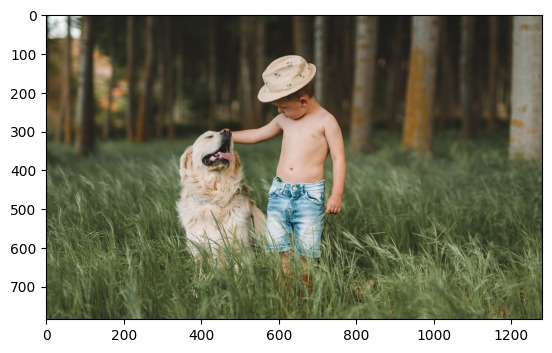

In [ ]:
# @title 画像の準備

# 画像が保存されているディレクトリのパス
img_dir = "/content/drive/MyDrive/Pixabay"  # @param {type:"string"}

# 処理対象の画像ファイル名
img_filename = "child-6276604_1280.jpg"  # @param {type:"string"}

img_path = os.path.join(
    img_dir, img_filename
)  # ディレクトリパスとファイル名を結合して完全なファイルパスを作成

img = cv2.imread(img_path)  # OpenCVを使用して画像を読み込む

# Matplotlib を使用して画像を表示
plt.imshow(img[:, :, ::-1])
plt.show()


In [ ]:
# @title 物体検出モデルの準備

model = YOLO("yolov8m.pt")


100%|██████████| 49.7M/49.7M [00:00<00:00, 252MB/s]


In [ ]:
# @title クラス一覧

classnames = model.names
print("クラスの数", len(classnames))
print(classnames)


クラスの数 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68


0: 416x640 1 person, 1 dog, 27.1ms
Speed: 3.7ms preprocess, 27.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


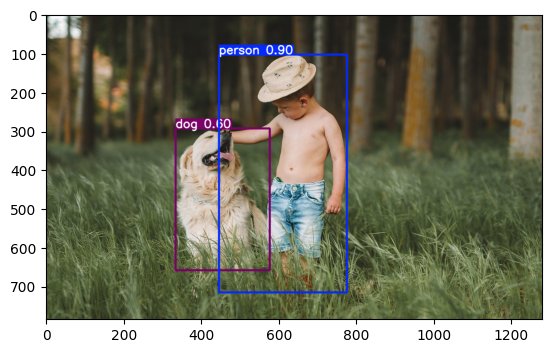

In [ ]:
# @title 推論

# predict()メソッドは画像内の物体を検出し、その結果をリストで返す
results = model.predict(img)

# plot()メソッドは検出結果を元の画像上に描画した新しい画像を返す
result_plot = results[0].plot()

# 生成された可視化結果を表示
plt.imshow(result_plot[:, :, ::-1])
plt.show()


In [ ]:
# @title ラベルごとの信頼度スコア

INDEX = 0

print("ラベルID: ", results[0].boxes.cls.cpu().numpy().astype(int)[INDEX])
print("信頼度スコア: ", results[0].boxes.conf.cpu().numpy()[INDEX])
print("検出矩形の座標: ", results[0].boxes.xyxy.cpu().numpy()[INDEX])


ラベルID:  0
信頼度スコア:  0.90283835
検出矩形の座標:  [     446.74      104.03      776.58      716.96]



0: 416x640 1 person, 2 dogs, 2 frisbees, 27.1ms
Speed: 3.8ms preprocess, 27.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


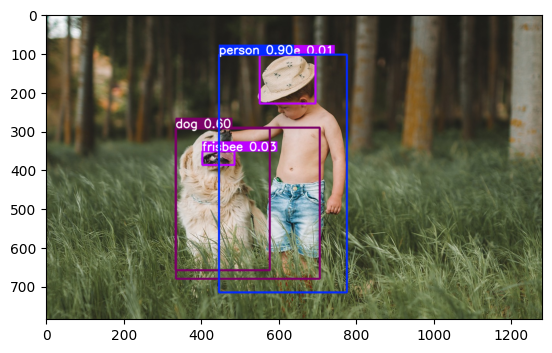

In [ ]:
# @title conf=0.01

results_ = model.predict(img, conf=0.01)

result_plot = results_[0].plot()
plt.imshow(result_plot[:, :, ::-1])
plt.show()



0: 416x640 1 person, 27.0ms
Speed: 2.8ms preprocess, 27.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


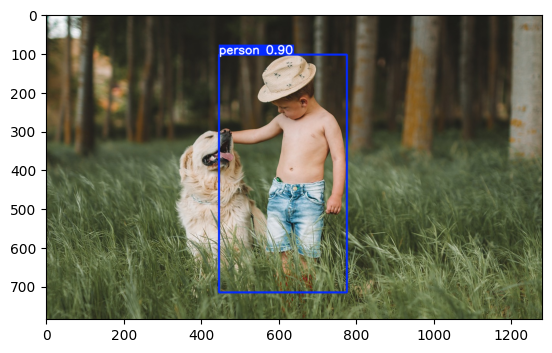

In [ ]:
# @title conf=0.8

results_ = model.predict(img, conf=0.8)

result_plot = results_[0].plot()
plt.imshow(result_plot[:, :, ::-1])
plt.show()


In [ ]:
# @title BBoxの定義

# フォントファイルのパスとキャッシュの設定
PATH_FONT = "/content/RictyDiminished/RictyDiminishedDiscord-Regular.ttf"
# フォントサイズごとのフォントオブジェクトを保存するキャッシュ
FONT_CACHE: "dict[int, ImageFont.FreeTypeFont]" = {}
# 文字ごとのマスク情報を保存するキャッシュ
CHAR_CACHE: (
    "dict[str, dict[int, tuple[bool, tuple[int, int, int, int], np.ndarray]]]"
) = {}


class BBox(BaseModel):
    """
    物体検出の境界ボックスを表すクラス
    座標、信頼度スコア、ラベルの情報を保持する
    """

    left: float  # 左端のx座標
    top: float  # 上端のy座標
    right: float  # 右端のx座標
    bottom: float  # 下端のy座標
    score: float  # 検出の信頼度スコア
    label: int  # クラスラベル

    def draw(
        self,
        img: np.ndarray,
        classnames: dict[str, str],
        color_mapping: dict[str, tuple[int, int, int]],
    ):
        """
        画像上に境界ボックスを描画するメソッド
        Args:
            img: 描画対象の画像
            classnames: ラベルIDと実際のクラス名の対応辞書
            color_mapping: クラス名と描画色の対応辞書
        """
        color = color_mapping[classnames[self.label]]

        # 矩形を描画
        cv2.rectangle(
            img,
            pt1=(int(self.left), int(self.top)),
            pt2=(int(self.right), int(self.bottom)),
            color=color,
            thickness=2,
        )
        self._put_text(img, color, classnames)

    def _put_text(self, img: np.ndarray, color, classnames):
        """
        境界ボックスの上部にクラス名を描画するメソッド
        日本語と英語の両方に対応し、文字ごとにマスクを使用して描画
        """
        text = classnames.get(self.label, "not found")
        pos = (int(self.left), int(self.top))
        size = 20

        # 改行などの制御文字を削除
        text = re.sub(r"[\t\n\r]", "", text)
        h, w, *_ = img.shape
        d = img.ndim
        offset = 5

        # 1文字ずつ描画処理
        for char in text:
            # 文字のマスク情報を取得
            jp, bbox, mask = self._get_char_mask(char, size)

            # 描画位置の計算と画像境界のチェック
            li = pos[0] + bbox[0] + offset
            ti = pos[1] + bbox[1]
            ri = pos[0] + bbox[2] + offset
            bi = pos[1] + bbox[3]

            lm = 0
            tm = 0
            rm = ri - li
            bm = bi - ti

            offset += bbox[2] - bbox[0]

            if li < 0:
                lm -= li
                li = 0
            if ti < 0:
                tm -= ti
                ti = 0
            if ri > w:
                rm -= ri - w
                ri = w
            if bi > h:
                bm -= bi - h
                bi = h
            if ((ri - li) <= 0) or ((bi - ti) <= 0):
                continue
            if d == 3:
                img[ti:bi, li:ri] = (
                    img[ti:bi, li:ri] * (1 - mask[tm:bm, lm:rm, np.newaxis])
                    + color * mask[tm:bm, lm:rm, np.newaxis]
                )
            else:
                img[ti:bi, li:ri] = (
                    img[ti:bi, li:ri] * (1 - mask[tm:bm, lm:rm])
                    + color * mask[tm:bm, lm:rm]
                )

    @staticmethod
    def _get_char_mask(char: str, size: int):
        """
        文字のマスク情報を取得または生成する
        キャッシュを活用して処理を効率化
        Args:
            char: 対象の文字
            size: フォントサイズ
        Returns:
            (日本語かどうか, 文字のバウンディングボックス, マスク配列)
        """

        def _get_font(size: int) -> "ImageFont.FreeTypeFont":
            """指定サイズのフォントオブジェクトを取得"""
            if size not in FONT_CACHE:
                FONT_CACHE[size] = ImageFont.truetype(PATH_FONT, size)
            return FONT_CACHE[size]

        # キャッシュにない場合は新規生成
        if char not in CHAR_CACHE:
            CHAR_CACHE[char] = {}
        caches = CHAR_CACHE[char]
        if size not in caches:
            font = _get_font(size)
            jp = not char.isascii()  # 日本語かどうかを判定
            bbox: "tuple[int, int, int, int]" = font.getbbox(char)
            # マスク画像の生成と正規化
            mask: "np.ndarray" = (
                np.asarray(font.getmask(char, "L"))
                .reshape(bbox[3] - bbox[1], bbox[2] - bbox[0])
                .astype(float)
                / 255
            )
            caches[size] = (jp, bbox, mask)
        return caches[size]


In [ ]:
# @title Detectionの定義


class Detection:
    """
    物体検出の結果を扱うクラス
    YOLOの検出結果をより扱いやすい形に変換し、描画機能も提供する
    """

    def __init__(self, bbox: BBox):
        """
        初期化メソッド
        Args:
            bbox: 検出された物体の境界ボックス情報
        """
        self.bbox: BBox = bbox

    def draw(self, img, classnames, color_mapping):
        """
        検出結果を画像上に描画するメソッド

        Args:
            img: 描画対象の画像
            classnames: クラスIDと名前の対応辞書
            color_mapping: クラス名と描画色の対応辞書
        """
        self.bbox.draw(img, classnames, color_mapping)

    @classmethod
    def postprocess(cls, result) -> "Detection":
        """
        YOLOの推論結果をDetectionオブジェクトに変換するクラスメソッド

        Args:
            result: YOLOの推論結果（Resultsオブジェクト）

        Returns:
            Detection: 変換された検出結果
        """
        bbox = cls._create_bbox(result)
        return cls(bbox)

    @staticmethod
    def _create_bbox(result) -> BBox:
        """
        YOLOの推論結果からBBoxオブジェクトを生成する静的メソッド

        Args:
            result: YOLOの推論結果（Resultsオブジェクト）

        Returns:
            BBox: 生成された境界ボックスオブジェクト

        処理の流れ:
            1. バウンディングボックスの座標をCPU上のNumPy配列に変換
            2. 信頼度スコアを取得
            3. クラスラベルを取得
            4. これらの情報からBBoxオブジェクトを生成
        """
        # バウンディングボックスの座標を取得（[x1, y1, x2, y2]形式）
        xyxy = result.boxes.xyxy.cpu().numpy()[0]

        # BBoxオブジェクトを生成して返す
        return BBox(
            # 座標値を整数に変換
            left=int(xyxy[0]),  # 左端のx座標
            top=int(xyxy[1]),  # 上端のy座標
            right=int(xyxy[2]),  # 右端のx座標
            bottom=int(xyxy[3]),  # 下端のy座標
            # 信頼度スコアを浮動小数点数として取得
            score=float(result.boxes.conf.cpu().numpy()[0]),
            # クラスラベルを整数として取得
            label=int(result.boxes.cls.cpu().numpy()[0]),
        )


In [ ]:
# @title 結果の再整理

detections = [Detection.postprocess(result) for result in results[0]]

for det in detections:
    print("det.bbox", det.bbox)


det.bbox left=446.0 top=104.0 right=776.0 bottom=716.0 score=0.9028383493423462 label=0
det.bbox left=334.0 top=294.0 right=577.0 bottom=659.0 score=0.597640872001648 label=16


In [ ]:
# @title 色の準備

GOLDEN_RATIO = 0.618033988749895


def get_color(idx: int, s: float = 0.8, vmin: float = 0.7) -> tuple[int, int, int]:
    h = np.fmod(idx * GOLDEN_RATIO, 1.0)
    v = 1.0 - np.fmod(idx * GOLDEN_RATIO, 1.0 - vmin)
    r, g, b = colorsys.hsv_to_rgb(h, s, v)
    return (int(255 * b), int(255 * g), int(255 * r))


color_mapping = {
    element: get_color(idx) for idx, element in enumerate(classnames.values())
}


In [ ]:
# @title 描画

result_img = img.copy()

for det in detections:
    det.draw(result_img, classnames, color_mapping)

plt.figure(dpi=300)
plt.imshow(result_img[:, :, ::-1])
plt.show()


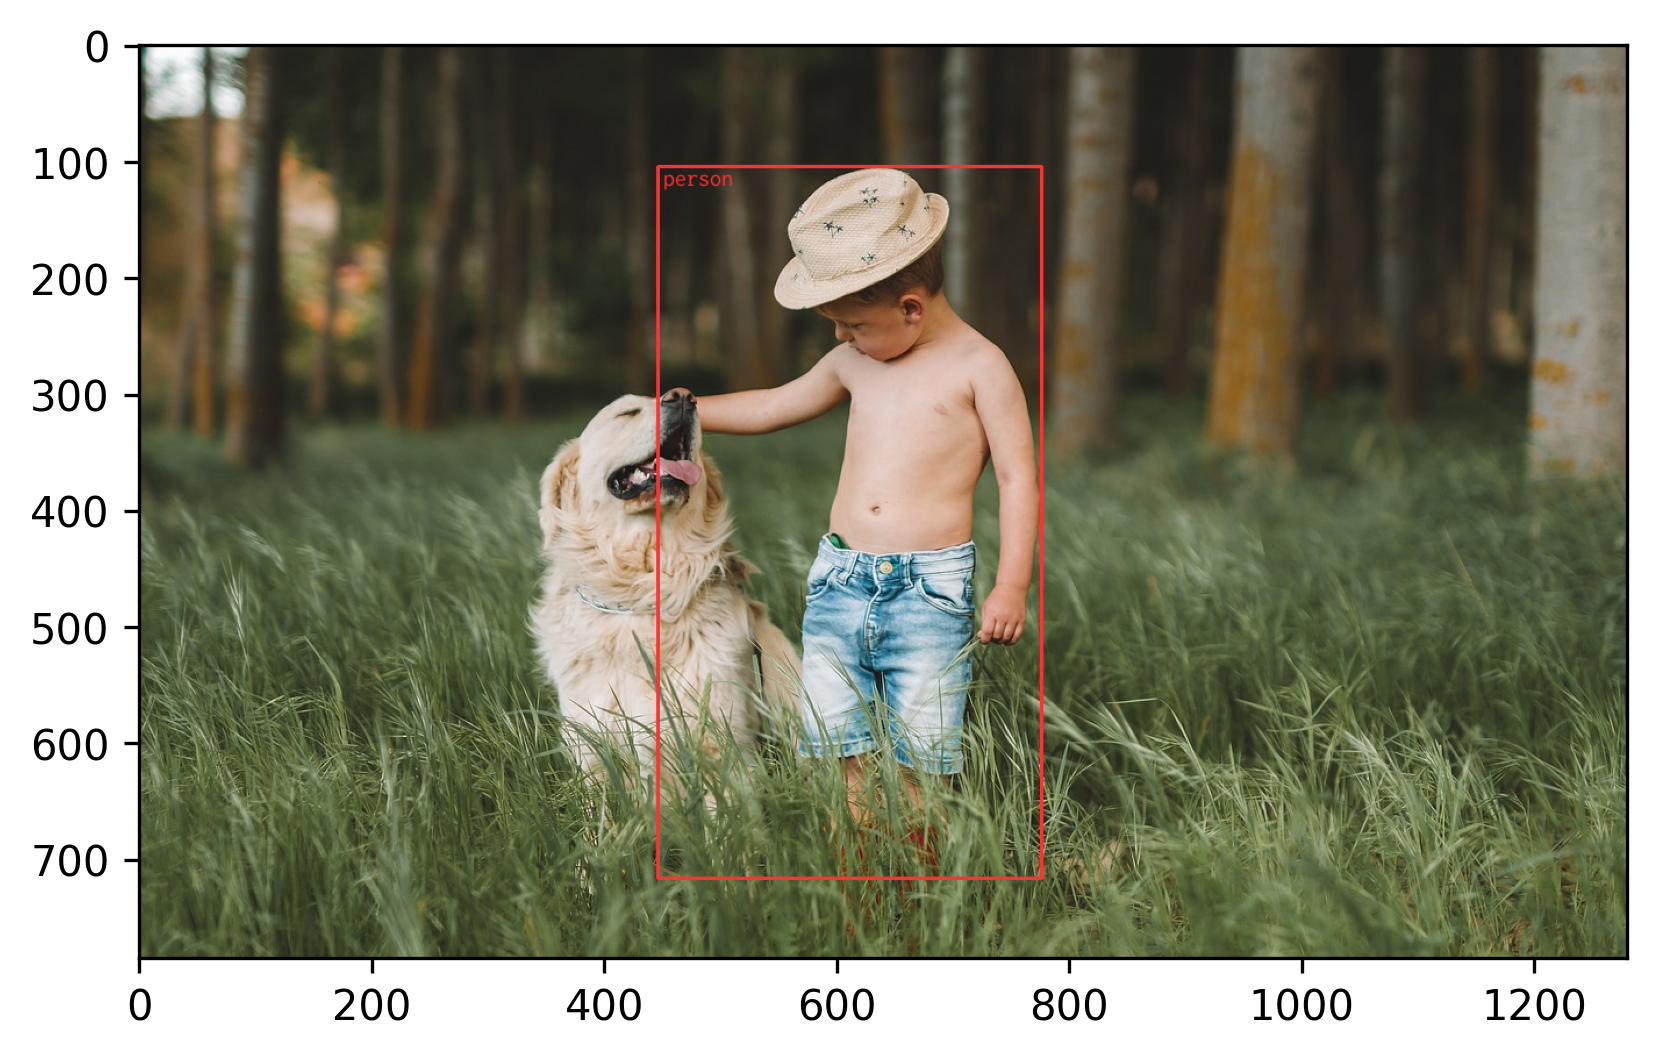

In [ ]:
# @title 描画（人物のみ）

result_img = img.copy()

for det in detections:
    if det.bbox.label == 0:
        det.draw(result_img, classnames, color_mapping)

plt.figure(dpi=300)
plt.imshow(result_img[:, :, ::-1])
plt.show()
